# Rede #2 Grafo Bipartido de Medicamentos e Princípios Ativos

In [24]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

## Importação do arquivo e tratamento dos dados

In [2]:
# Ler o dataset dados.csv
df = pd.read_csv('dados.csv', encoding='latin1', delimiter=';')
df.shape
df.head()

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166.0,01/04/2005,250000254169821,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001.0,01/05/2005,2501017185899,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305.0,01/05/2006,253510228050056,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,MEDICAMENTO,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021.0,01/03/2007,2502500782199,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,MEDICAMENTO,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004.0,01/06/2007,253510326310184,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN


In [3]:
df = df.dropna()
df.head()
df.shape

(10768, 11)

In [4]:
df = df.drop(columns=['TIPO_PRODUTO', 'DATA_FINALIZACAO_PROCESSO', 'NUMERO_REGISTRO_PRODUTO', 'DATA_VENCIMENTO_REGISTRO', 'NUMERO_PROCESSO'])
df.head()

,NOME_PRODUTO,CATEGORIA_REGULATORIA,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
38,A SAÚDE DA MULHER,NOVO,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,57507378000365 - EMS S/A,VÁLIDO,EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA + E...
42,AAS,SIMILAR,ANALGESICOS NAO NARCOTICOS,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ACIDO ACETILSALICILICO
45,AAS PROTECT,SIMILAR,ANTIAGREGANTE PLAQUETARIO,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ÁCIDO ACETILSALICÍLICO
47,ABBA,SIMILAR,AGENTES ANTINEOPLÁSICOS,05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,VÁLIDO,ACETATO DE ABIRATERONA
50,ABC,SIMILAR,ANTIMICOTICOS PARA USO TOPICO,92695691000103 - KLEY HERTZ FARMACEUTICA S.A,VÁLIDO,CLOTRIMAZOL


In [5]:
# Transformar a coluna PRINCIPIO_ATIVO em uma lista de princípios ativos
df['PRINCIPIO_ATIVO'] = df['PRINCIPIO_ATIVO'].apply(lambda x: [principio.strip() for principio in x.split('+')])

# Exibir as primeiras linhas do dataframe para verificar as mudanças
df.head()

,NOME_PRODUTO,CATEGORIA_REGULATORIA,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
38,A SAÚDE DA MULHER,NOVO,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,57507378000365 - EMS S/A,VÁLIDO,"[EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA, EX..."
42,AAS,SIMILAR,ANALGESICOS NAO NARCOTICOS,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,[ACIDO ACETILSALICILICO]
45,AAS PROTECT,SIMILAR,ANTIAGREGANTE PLAQUETARIO,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,[ÁCIDO ACETILSALICÍLICO]
47,ABBA,SIMILAR,AGENTES ANTINEOPLÁSICOS,05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,VÁLIDO,[ACETATO DE ABIRATERONA]
50,ABC,SIMILAR,ANTIMICOTICOS PARA USO TOPICO,92695691000103 - KLEY HERTZ FARMACEUTICA S.A,VÁLIDO,[CLOTRIMAZOL]


## Construção da rede

In [19]:
B = nx.Graph()

# Adicionar nós para cada elemento da coluna 'NOME_PRODUTO'
produtos = df['NOME_PRODUTO'].tolist()
B.add_nodes_from(produtos, bipartite=0)

# Adicionar nós para cada elemento da coluna 'PRINCIPIO_ATIVO'
principios_ativos = set()
for principios in df['PRINCIPIO_ATIVO']:
    principios_ativos.update(principios)
B.add_nodes_from(principios_ativos, bipartite=1)

# Adicionar arestas entre 'NOME_PRODUTO' e 'PRINCIPIO_ATIVO' apenas se os nomes forem diferentes
for _, row in df.iterrows():
    produto = row['NOME_PRODUTO']
    for principio in row['PRINCIPIO_ATIVO']:
        if produto != principio:  # Verificar se os nomes são diferentes
            B.add_edge(produto, principio)

# Função para informar a quantidade de nós de cada grupo e a quantidade de arestas totais
def informacoes_grafo_bipartido(grafo):
    # Obter os conjuntos bipartidos
    conjunto_0 = {n for n, d in grafo.nodes(data=True) if d['bipartite'] == 0}
    conjunto_1 = {n for n, d in grafo.nodes(data=True) if d['bipartite'] == 1}
    
    # Imprimir a quantidade de nós de cada grupo
    print(f"Quantidade de nós no conjunto 0 (produtos): {len(conjunto_0)}")
    print(f"Quantidade de nós no conjunto 1 (princípios ativos): {len(conjunto_1)}")
    
    # Imprimir a quantidade de arestas totais
    print(f"Quantidade de arestas totais: {grafo.number_of_edges()}")

# Chamar a função para exibir as informações do grafo bipartido
informacoes_grafo_bipartido(B)


Quantidade de nós no conjunto 0 (produtos): 7050
Quantidade de nós no conjunto 1 (princípios ativos): 2326
Quantidade de arestas totais: 10582


## Plot do grafo

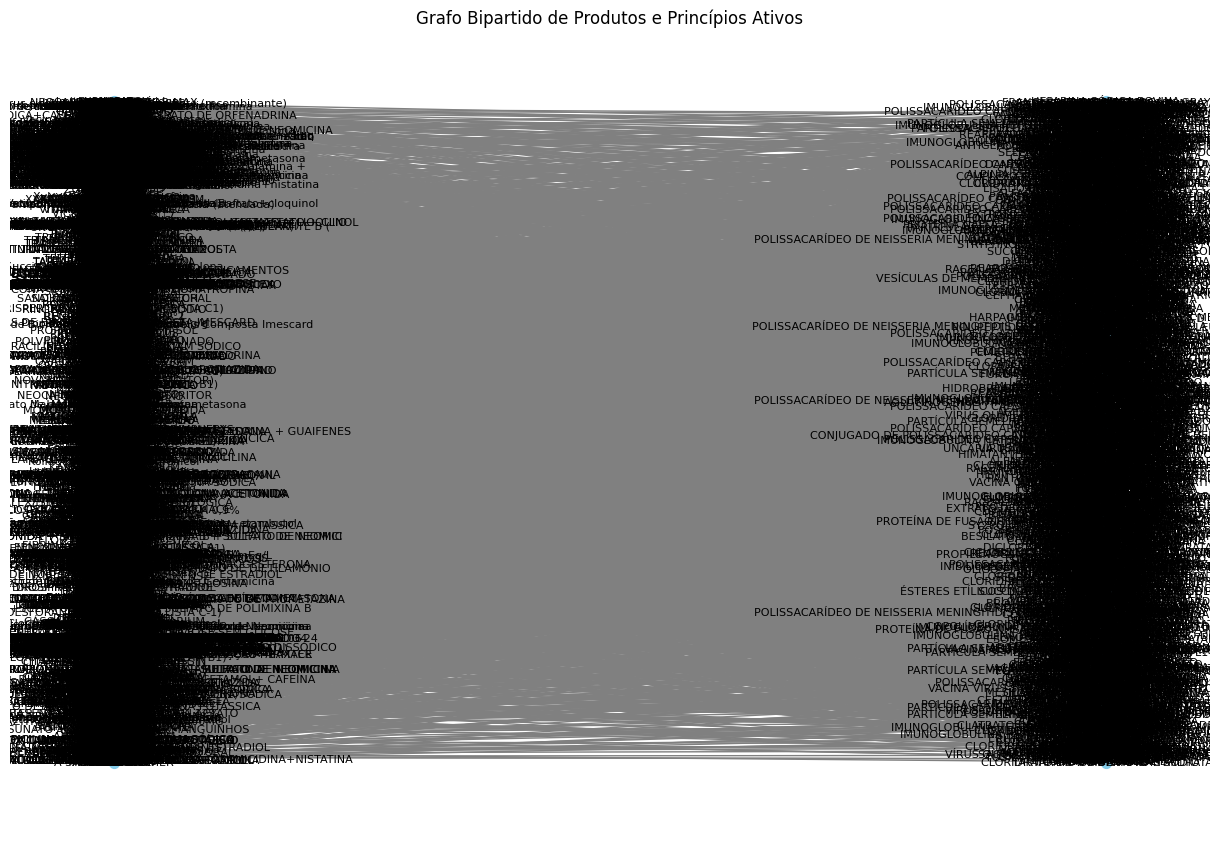

In [15]:
# Definir a posição dos nós para o layout bipartido
pos = nx.bipartite_layout(B, produtos)

# Desenhar o grafo
plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', edge_color='gray')
plt.title("Grafo Bipartido de Produtos e Princípios Ativos")
plt.show()

In [20]:
assortatividade_grau = nx.degree_assortativity_coefficient(B)
print(f"Assortatividade por grau do grafo: {assortatividade_grau}")

Assortatividade por grau do grafo: -0.17652002021352955


## Plot do grafo da relação entre média de vizinhos e quantidade de vizinhos

In [22]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(B).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

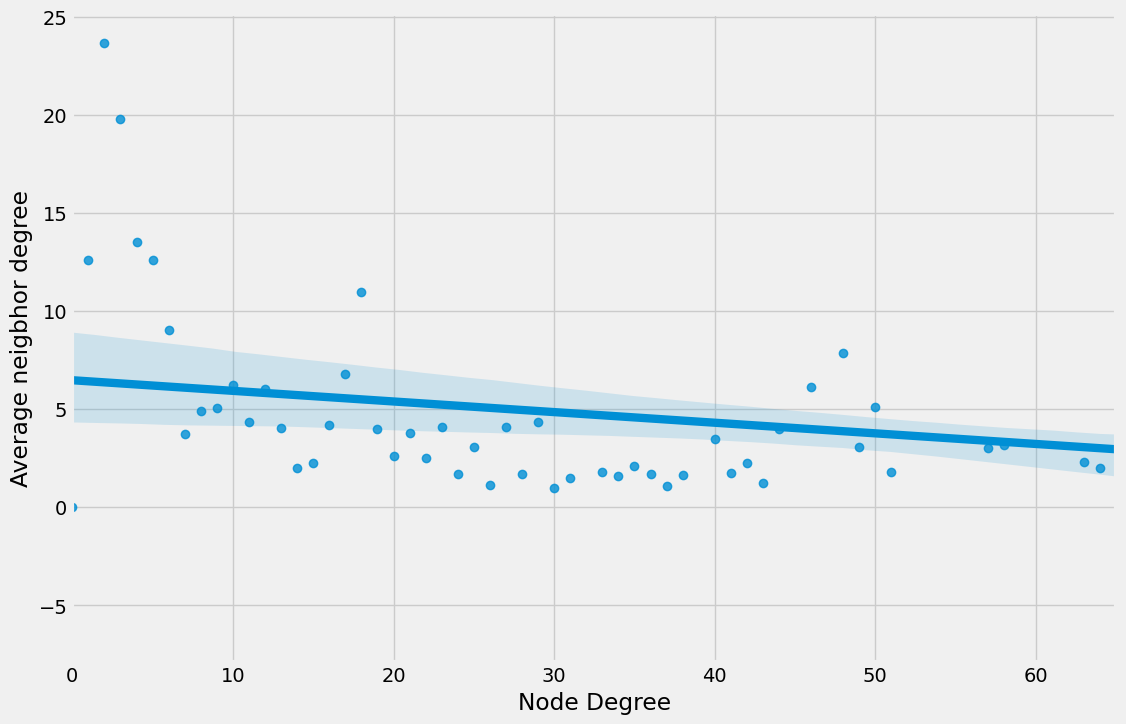

In [25]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=True)

plt.show()